In [126]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error 
import statsmodels.api as sm

In [129]:
data = pd.read_csv('filled_data1.csv',index_col=0)

In [130]:
data.rename(columns={'0':'price_per_square','1':'squares','2':'max_floor','3':'latitude','4':'longitude','5':'Nevskii prospekt',
                     '6':'parkings_1km','7':'rent_per_m'},inplace=True)

In [132]:
data.describe()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,8
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000
mean,250132.417961,105.059796,9.019284,30.320065,59.928093,8.550567,44.631405,182743.364298,1.567493
std,70669.794619,82.582223,7.862459,0.091875,0.078489,6.916421,22.784069,112125.462238,0.495560
min,33750.000000,1.000000,1.000000,29.766935,59.684086,0.120000,1.000000,1000.000000,1.000000
25%,204715.500000,56.225000,2.000000,30.274698,59.879240,3.640000,27.000000,100000.000000,1.000000
50%,251954.800000,89.000000,6.000000,30.326244,59.932915,7.050000,41.000000,157400.000000,2.000000
75%,294385.600000,132.970000,14.000000,30.371806,59.984420,11.695000,59.000000,246500.000000,2.000000
max,450000.000000,1256.000000,40.000000,30.583368,60.119969,62.310000,127.000000,500000.000000,2.000000


In [136]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [138]:

X = data[['price_per_square','squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km','rent_per_m']]
y = data[['8']]


In [139]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=99)


In [146]:
# Создание экземпляра классификатора KNN
knn = KNeighborsClassifier(n_neighbors=10)

# Обучение модели
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [147]:
# Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN classifier on test set: {accuracy:.2f}')


Accuracy of KNN classifier on test set: 0.68


In [148]:
from sklearn.metrics import confusion_matrix, classification_report

# Получение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[204 118]
 [111 293]]


In [149]:
# Вывод отчета о классификации
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

         1.0       0.65      0.63      0.64       322
         2.0       0.71      0.73      0.72       404

    accuracy                           0.68       726
   macro avg       0.68      0.68      0.68       726
weighted avg       0.68      0.68      0.68       726



In [5]:
data = data[['price_per_square', 'squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km','rent_per_m']]

In [6]:
data = data[data['price_per_square']>= 30000.0]

In [7]:
Q1 = data['price_per_square'].quantile(0.05)
Q3 = data['price_per_square'].quantile(0.95)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price_per_square'] >= lower_bound) & (data['price_per_square'] <= upper_bound)]

# Строим Лес

In [150]:
df_1 = data.copy()

In [151]:
X = df_1[['squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km','rent_per_m']]
y = df_1['price_per_square']

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 999)

In [170]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.9123372294635124

In [154]:
predictions1 = rfc.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions1))
print(rmse)
print(mean_absolute_error(y_train, predictions1))
print(mean_absolute_percentage_error(y_train, predictions1))

21300.72754305445
15720.56644654335
0.08143844077730329


In [155]:
predictions2 = rfc.predict(X_test)
#Calculate the root mean squared error
display(rfc.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print(rmse)
print(mean_absolute_error(y_test, predictions2))
print(mean_absolute_percentage_error(y_test, predictions2))

0.31419075965671517

57228.42007749025
42625.42939557917
0.210919059980457


In [156]:
from sklearn.ensemble import ExtraTreesRegressor

rfc = ExtraTreesRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.9996022455780086

In [157]:
predictions1 = rfc.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions1))
print(rmse)
print(mean_absolute_error(y_train, predictions1))
print(mean_absolute_percentage_error(y_train, predictions1))

1429.1161138446105
66.71441689640166
0.00024171700035545643


In [158]:
predictions2 = rfc.predict(X_test)
#Calculate the root mean squared error
display(rfc.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print(rmse)
print(mean_absolute_error(y_test, predictions2))
print(mean_absolute_percentage_error(y_test, predictions2))

0.30698793217168807

57528.16069229871
42742.37727272727
0.21031696205986408


# Настроим параметры

In [ ]:
from sklearn.model_selection import GridSearchCV

## Defining param grid 
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350],
    'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
}

## Creating a random forest regressor object
rf_regressor = RandomForestRegressor(random_state=999)
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X, y)

# Getting the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 999)

from sklearn.ensemble import RandomForestRegressor

rfc1 = RandomForestRegressor(n_estimators=200,max_depth=22)
rfc1.fit(X_train, y_train)
display(rfc1.score(X_train, y_train))

In [ ]:
predictions3 = rfc1.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions3))
print(rmse)
print(mean_absolute_error(y_train, predictions3))
print(mean_absolute_percentage_error(y_train, predictions3))

In [ ]:
predictions4 = rfc1.predict(X_test)
#Calculate the root mean squared error
display(rfc1.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions4))
print(rmse)
print(mean_absolute_error(y_test, predictions4))
print(mean_absolute_percentage_error(y_test, predictions4))

In [ ]:
predictions5 = rfc1.predict(X)
#Calculate the root mean squared error
display(rfc1.score(X, y))
rmse = np.sqrt(mean_squared_error(y, predictions5))
print(rmse)
print(mean_absolute_error(y, predictions5))
print(mean_absolute_percentage_error(y, predictions5))

# Интерпретация параметров

In [159]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                  importance
max_floor           0.166389
squares             0.157842
parkings_1km        0.157368
longitude           0.147373
rent_per_m          0.140254
latitude            0.118324
Nevskii prospekt    0.112451


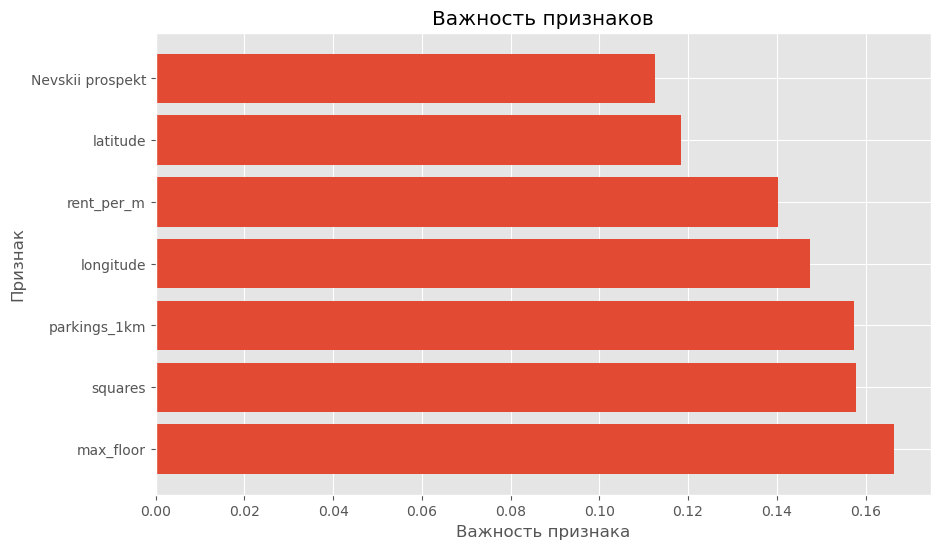

In [160]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()

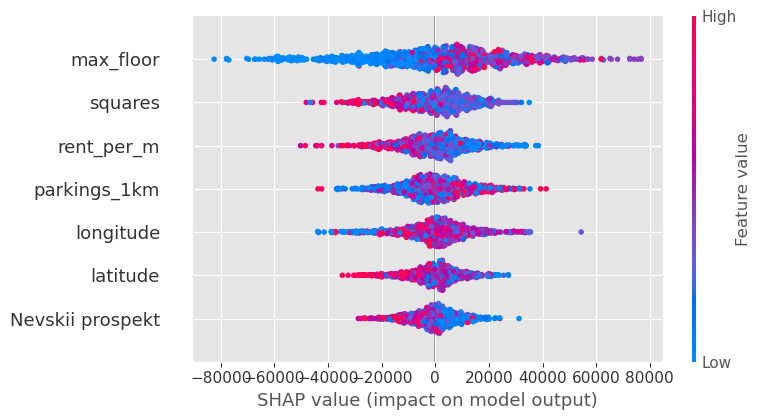

In [162]:
import shap

explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [166]:

shap_means = (shap_values).mean(axis=0)

# Вывод средних значений SHAP
for name, mean_shap in zip(X_train.columns, shap_means):
    print(f"{name}: {mean_shap}")

squares: -249.23901994241965
max_floor: 1276.5556238794757
latitude: -303.72975503872203
longitude: 212.51598226429866
Nevskii prospekt: -404.61310787661506
parkings_1km: -331.0429678188967
rent_per_m: -200.4467554670897


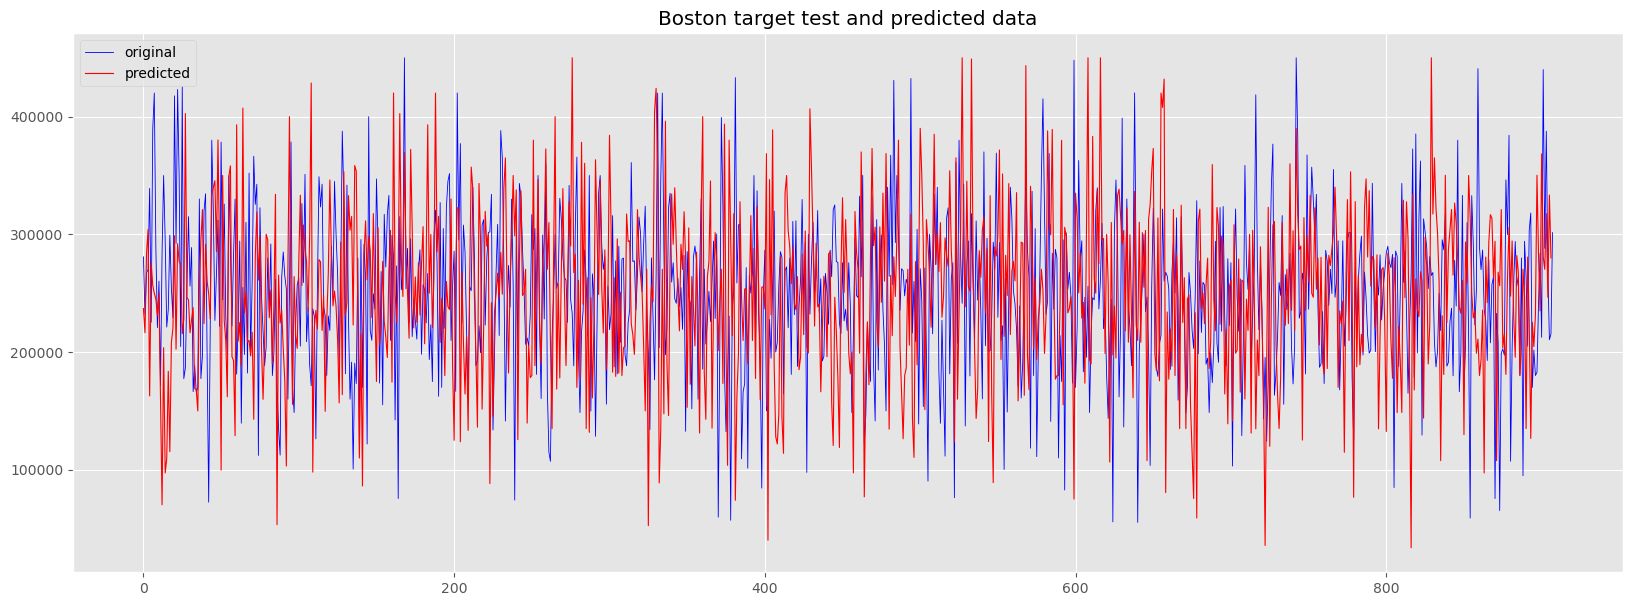

In [174]:
x_ax = range(len(y_train))
x_ax1 = range(len(y_test))
plt.figure(figsize = (20,7))
plt.plot(x_ax1, y_test, lw=0.6, color="blue", label="original")
plt.plot(x_ax, y_train, lw=0.8, color="red", label="predicted")
plt.title("Boston target test and predicted data")
plt.legend()
plt.show()

In [17]:
data

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0
...,...,...,...,...,...,...,...,...
1991,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0
1993,209860.0,650.0,5.0,30.261969,59.852335,8.29,32.0,422500.0
2008,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0
2010,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0


# Добавление популяции по районам

Мы берем фиктивные переменные по районам, затем согласно ним присоединяем в столбец популяции данные по соответствующему району

In [18]:
data.reset_index(inplace=True)

In [19]:
data=data[['price_per_square', 'squares', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','parkings_1km','rent_per_m']]

In [20]:
data

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0
...,...,...,...,...,...,...,...,...
1810,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0
1811,209860.0,650.0,5.0,30.261969,59.852335,8.29,32.0,422500.0
1812,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0
1813,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0


In [21]:
rk = pd.read_csv(r'C:\Users\pelik\python\diplomopis\spb_geo\boundary-polygon-land-lvl5.csv')

In [22]:
rk.columns

Index(['WKT\tNAME\tNAME_EN\tNAME_RU\tADMIN_LVL\tOSM_TYPE\tOSM_ID\tADMIN_L1D\tADMIN_L1\tADMIN_L2D\tADMIN_L2\tADMIN_L3D\tADMIN_L3\tADMIN_L4D\tADMIN_L4\tADMIN_L5D\tADMIN_L5\tADMIN_L6D\tADMIN_L6\tADMIN_L7D\tADMIN_L7\tADMIN_L8D\tADMIN_L8\tADMIN_L9D\tADMIN_L9\tADMIN_L10D\tADMIN_L10\toktmo\tokato'], dtype='object')

In [23]:
rk = rk.rename(columns={'WKT\tNAME\tNAME_EN\tNAME_RU\tADMIN_LVL\tOSM_TYPE\tOSM_ID\tADMIN_L1D\tADMIN_L1\tADMIN_L2D\tADMIN_L2\tADMIN_L3D\tADMIN_L3\tADMIN_L4D\tADMIN_L4\tADMIN_L5D\tADMIN_L5\tADMIN_L6D\tADMIN_L6\tADMIN_L7D\tADMIN_L7\tADMIN_L8D\tADMIN_L8\tADMIN_L9D\tADMIN_L9\tADMIN_L10D\tADMIN_L10\toktmo\tokato':'polygon'})

In [24]:
rk.iat[3,0]

'POLYGON ((30.3379519 59.9209349,30.3377953 59.9210607,30.3371941 59.9215543,30.3371123 59.9216252,30.3365553 59.9220907,30.3364728 59.9221597,30.3363696 59.9222493,30.3361621 59.9224251,30.336107 59.9224643,30.3352309 59.9233162,30.3357858 59.9235368,30.3304534 59.9260735,30.3300187 59.9262994,30.32703 59.9251507,30.3218708 59.9285986,30.318983 59.93053,30.3178175 59.9313099,30.3153107 59.9329953,30.3118605 59.9353013,30.3117762 59.9353581,30.311539 59.9355176,30.3114609 59.9355701,30.3114179 59.935599,30.3112298 59.9357255,30.3109312 59.9359263,30.3108416 59.9359866,30.3105593 59.9361765,30.3104029 59.9362817,30.3103119 59.9363429,30.3102313 59.9363971,30.3101295 59.9364655,30.3103024 59.9366458,30.3123914 59.9373876,30.3124162 59.9374581,30.3126331 59.9379477,30.3126379 59.9380088,30.3126288 59.9380613,30.3126137 59.9381018,30.3125887 59.9381449,30.3125619 59.9381783,30.3125203 59.9382183,30.3124762 59.9382558,30.3124315 59.9382896,30.309989 59.9398884,30.3090786 59.9405117,30.30827

In [25]:
districts = []

for i in range (18):
    string = rk.iat[i,0]

    # Разделение строки по табуляции и выбор английского значения
    english_value = string.split('\t')[2]

    # Удаление лишних пробелов и символов переноса строки
    english_value = english_value.strip()
    english_value = english_value.replace(' District','')

    # Вывод результата
    districts.append(english_value)


In [26]:
districts

['Pushkinsky',
 'Kolpinsky',
 'Primorsky',
 'Tsentralny',
 'Kalininsky',
 'Krasnogvardeysky',
 'Admiralteysky',
 'Vyborgsky',
 'Frunzensky',
 'Nevsky',
 'Petrogradsky',
 'Vasileostrovsky',
 'Krasnoselsky',
 'Kirovsky',
 'Moskovsky',
 'Kronshtadtsky',
 'Kurortny',
 'Petrodvortsovy']

In [27]:
data[districts] = 0

In [28]:
len(data)

1815

In [29]:
from shapely.geometry import Point, Polygon
from shapely.wkt import loads

In [30]:
rk['polygon'] = rk['polygon'].apply(loads)

In [31]:
def point_in_polygon(point):
    for polygon in range(len(rk['polygon'])):
        if rk['polygon'].iloc[polygon].contains(point):
            data[districts[polygon]][i] = 1
    return False

In [32]:
global i
for i in range(1815):
        point_in_polygon(Point(data.iat[i,3],data.iat[i,4]))


In [33]:
data

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Kolpinsky,...,Frunzensky,Nevsky,Petrogradsky,Vasileostrovsky,Krasnoselsky,Kirovsky,Moskovsky,Kronshtadtsky,Kurortny,Petrodvortsovy
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1811,209860.0,650.0,5.0,30.261969,59.852335,8.29,32.0,422500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1812,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1813,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
distr_df = pd.read_csv(r'C:\Users\pelik\python\diplomopis\districts\districts.csv', sep = ' ')
distr_df

,district,population
0,Admiralteysky,155981
1,Vasileostrovsky,206680
2,Vyborgsky,541590
3,Kalininsky,536794
4,Kirovsky,335774
5,Kolpinsky,186169
6,Krasnogvardeysky,366971
7,Krasnoselsky,431546
8,Kronshtadtsky,44414
9,Kurortny,83491


In [35]:
data.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Pushkinsky',
       'Kolpinsky', 'Primorsky', 'Tsentralny', 'Kalininsky',
       'Krasnogvardeysky', 'Admiralteysky', 'Vyborgsky', 'Frunzensky',
       'Nevsky', 'Petrogradsky', 'Vasileostrovsky', 'Krasnoselsky', 'Kirovsky',
       'Moskovsky', 'Kronshtadtsky', 'Kurortny', 'Petrodvortsovy'],
      dtype='object')

In [36]:
data[districts].sum(axis=0)

Pushkinsky          106
Kolpinsky             7
Primorsky           225
Tsentralny          229
Kalininsky           91
Krasnogvardeysky    113
Admiralteysky       153
Vyborgsky           166
Frunzensky           82
Nevsky              101
Petrogradsky        106
Vasileostrovsky     122
Krasnoselsky        105
Kirovsky             53
Moskovsky           138
Kronshtadtsky         0
Kurortny              7
Petrodvortsovy       11
dtype: int64

In [ ]:
# disls = ['Primorsky',
#        'Tsentralny', 'Kalininsky', 'Krasnogvardeysky', 'Admiralteysky',
#        'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky', 'Vasileostrovsky',
#        'Krasnoselsky', 'Moskovsky']

In [ ]:
# data['in_diss'] = data[disls].sum(axis=1)

In [ ]:
# data[data['in_diss'] == 0].to_csv('not_in_districts.csv',encoding = 'utf-8')

In [ ]:
# df.sum(axis = 0)

In [37]:
rem_cols = ['Kolpinsky','Kronshtadtsky','Kurortny','Petrodvortsovy']

In [38]:
data = data.drop(rem_cols, axis=1)

In [ ]:
# data = data[data['Pushkinsky'] == 0]
# data = data[data['Kirovsky'] == 0]

In [39]:
len(data)

1815

In [ ]:
# rem_cols = ['Kirovsky','Pushkinsky']

In [ ]:
# data = data.drop(rem_cols, axis=1)

In [ ]:
data.columns

In [43]:
rem_rows = ['Kolpinsky','Kronshtadtsky','Kurortny','Petrodvortsovy']

In [44]:
distr_df = distr_df[~distr_df.district.isin(rem_rows)]

In [40]:
data['population'] = 0

In [41]:
data.describe()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,...,Admiralteysky,Vyborgsky,Frunzensky,Nevsky,Petrogradsky,Vasileostrovsky,Krasnoselsky,Kirovsky,Moskovsky,population
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,...,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.0
mean,250132.417961,105.059796,9.019284,30.320065,59.928093,8.550567,44.631405,182743.364298,0.058402,0.123967,...,0.084298,0.091460,0.045179,0.055647,0.058402,0.067218,0.057851,0.029201,0.076033,0.0
std,70669.794619,82.582223,7.862459,0.091875,0.078489,6.916421,22.784069,112125.462238,0.234567,0.329635,...,0.277910,0.288342,0.207754,0.229303,0.234567,0.250468,0.233526,0.168416,0.265124,0.0
min,33750.000000,1.000000,1.000000,29.766935,59.684086,0.120000,1.000000,1000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,204715.500000,56.225000,2.000000,30.274698,59.879240,3.640000,27.000000,100000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,251954.800000,89.000000,6.000000,30.326244,59.932915,7.050000,41.000000,157400.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,294385.600000,132.970000,14.000000,30.371806,59.984420,11.695000,59.000000,246500.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,450000.000000,1256.000000,40.000000,30.583368,60.119969,62.310000,127.000000,500000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [42]:
data['mean_distr_pps'] = 0.0

In [45]:

for i in range(len(distr_df)):
    print(distr_df.iat[i,0])
    data.loc[data[distr_df.iat[i, 0]] == 1, 'population'] = distr_df.iat[i,1]
    data.loc[data[distr_df.iat[i, 0]] == 1, 'mean_distr_pps'] = data.loc[data[distr_df.iat[i, 0]] == 1, 'price_per_square'].mean()

Admiralteysky
Vasileostrovsky
Vyborgsky
Kalininsky
Kirovsky
Krasnogvardeysky
Krasnoselsky
Moskovsky
Nevsky
Petrogradsky
Primorsky
Pushkinsky
Frunzensky
Tsentralny


In [46]:
data.loc[data['Tsentralny'] == 1, 'price_per_square'].mean()

241670.61921397378

In [47]:
data.sort_values(by='population',ascending=True).head(10)

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,...,Vyborgsky,Frunzensky,Nevsky,Petrogradsky,Vasileostrovsky,Krasnoselsky,Kirovsky,Moskovsky,population,mean_distr_pps
749,261484.2,77.0,1.0,29.766935,59.914416,62.31,22.0,190000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
27,296635.6,9.0,10.0,29.892142,59.881006,48.40,18.0,12000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1775,180056.4,315.5,1.0,29.952428,60.091096,41.87,22.0,59945.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1395,180272.6,137.9,4.0,29.863710,59.880712,51.55,51.0,179270.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
500,283909.6,60.0,10.0,30.581311,59.735704,30.87,25.0,60000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
701,259467.4,74.0,10.0,30.575661,59.736081,30.27,19.0,170000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1742,180056.4,265.0,2.0,30.583368,59.736004,31.08,25.0,185500.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1258,218975.6,120.0,3.0,30.006264,60.054693,35.88,9.0,336000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1577,171481.6,170.0,5.0,29.913872,59.870072,45.99,17.0,450000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
43,260846.6,12.0,2.0,30.000946,60.053656,36.46,6.0,18000.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [49]:
data = data[data['population'] != 0]

In [50]:
data.describe()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,...,Vyborgsky,Frunzensky,Nevsky,Petrogradsky,Vasileostrovsky,Krasnoselsky,Kirovsky,Moskovsky,population,mean_distr_pps
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,...,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000
mean,250298.486480,104.734318,9.032402,30.322839,59.928487,8.121715,44.991061,182868.346480,0.059218,0.125698,...,0.092737,0.045810,0.056425,0.059218,0.068156,0.058659,0.029609,0.077095,375116.311173,250298.486480
std,70944.701175,82.175269,7.869325,0.082028,0.077497,5.743941,22.708224,111968.645235,0.236098,0.331602,...,0.290145,0.209131,0.230804,0.236098,0.252085,0.235051,0.169553,0.266817,184083.865142,16122.965118
min,33750.000000,1.000000,1.000000,29.999796,59.684086,0.120000,1.000000,1000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115757.000000,216441.671698
25%,204759.050000,56.200000,2.000000,30.276001,59.880582,3.622500,27.000000,100000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200654.000000,236507.113253
50%,251757.400000,89.000000,6.000000,30.326307,59.933129,6.995000,41.000000,157138.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,335774.000000,248729.143791
75%,294521.000000,132.700000,14.000000,30.371770,59.984349,11.312500,59.000000,246750.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,541590.000000,263780.524528
max,450000.000000,1256.000000,40.000000,30.518780,60.110679,36.520000,127.000000,500000.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,699243.000000,276841.921739


In [ ]:
data.columns

In [51]:
df_2 = data.copy()

In [52]:
X = df_2[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'population','mean_distr_pps']]
y = df_2['price_per_square']

In [53]:
# Load libraries
import os
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [ ]:
df_2.corr()

In [ ]:
df_2.columns

In [75]:
# Split-out validation dataset
X = df_2[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Primorsky',
       'Tsentralny', 'Kalininsky', 'Krasnogvardeysky', 'Admiralteysky',
       'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky', 'Vasileostrovsky',
       'Krasnoselsky', 'population','mean_distr_pps']]
Y = df_2['price_per_square']
validation_size = 0.5
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [92]:
for i in data.columns:
    correlation, p_value = pearsonr(data['price_per_square'], data[i])
    if p_value >= 0.05:
        print(f"{i}: correlation={correlation}, p-value={p_value}")

Kalininsky: correlation=0.04065726102981714, p-value=0.08549558221454773
Admiralteysky: correlation=-0.00676457546083124, p-value=0.7748768530144813
Frunzensky: correlation=0.013587346871711654, p-value=0.5656404985726105
Vasileostrovsky: correlation=0.03455675567084233, p-value=0.1438903629754556
Krasnoselsky: correlation=0.005403435647159779, p-value=0.8192943677964502
Kirovsky: correlation=-0.03620381023549624, p-value=0.12573061003798672


In [98]:
data1 = data[data['Kalininsky'] !=1]
data1 = data[data['Admiralteysky'] !=1]
data1 = data[data['Frunzensky'] !=1]
data1 = data[data['Vasileostrovsky'] !=1]
data1 = data[data['Krasnoselsky'] !=1]
data1 = data[data['Kirovsky'] !=1]
data1.drop(columns = ['Kalininsky','Admiralteysky','Frunzensky','Vasileostrovsky','Krasnoselsky','Kirovsky'],inplace=True)

In [99]:
data1

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,Tsentralny,Krasnogvardeysky,Vyborgsky,Nevsky,Petrogradsky,Moskovsky,population,mean_distr_pps
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0,0,0,0,0,1,0,0,0,541590,236507.113253
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0,0,0,0,0,0,0,0,1,335221,276841.921739
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0,0,1,0,0,0,0,0,0,699243,269920.705778
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0,0,0,0,1,0,0,0,0,366971,235136.752212
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0,0,0,0,0,0,1,0,0,547896,233645.419802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,209860.0,624.0,6.0,30.361844,59.809202,7.74,24.0,436800.0,1,0,0,0,0,0,0,0,263732,216441.671698
1810,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0,0,1,0,0,0,0,0,0,699243,269920.705778
1812,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0,0,0,0,0,0,1,0,0,547896,233645.419802
1813,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0,0,0,0,0,0,0,0,0,413983,254696.639024


In [95]:
data[data['Vasileostrovsky'] !=1]

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,...,Vyborgsky,Frunzensky,Nevsky,Petrogradsky,Vasileostrovsky,Krasnoselsky,Kirovsky,Moskovsky,population,mean_distr_pps
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0,0,0,...,1,0,0,0,0,0,0,0,541590,236507.113253
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0,0,0,...,0,0,0,0,0,0,0,1,335221,276841.921739
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0,0,1,...,0,0,0,0,0,0,0,0,699243,269920.705778
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0,0,0,...,0,0,0,0,0,0,0,0,366971,235136.752212
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0,0,0,...,0,0,1,0,0,0,0,0,547896,233645.419802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0,0,1,...,0,0,0,0,0,0,0,0,699243,269920.705778
1811,209860.0,650.0,5.0,30.261969,59.852335,8.29,32.0,422500.0,0,0,...,0,0,0,0,0,0,1,0,335774,235598.569811
1812,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0,0,0,...,0,0,1,0,0,0,0,0,547896,233645.419802
1813,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0,0,0,...,0,1,0,0,0,0,0,0,413983,254696.639024


In [100]:
df_2=data1.copy()

In [ ]:
'Kalininsky','Admiralteysky','Frunzensky','Vasileostrovsky','Krasnoselsky','Kirovsky'

In [235]:
# Split-out validation dataset
X = df[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Primorsky',
       'Tsentralny', 'Krasnogvardeysky','Vyborgsky', 'Nevsky', 'Petrogradsky', 'population','mean_distr_pps','pub_trans_1km']]
Y = df['price_per_square']


In [213]:
df_2

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,Tsentralny,Krasnogvardeysky,Vyborgsky,Nevsky,Petrogradsky,Moskovsky,population,mean_distr_pps
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0,0,0,0,0,1,0,0,0,541590,236507.113253
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0,0,0,0,0,0,0,0,1,335221,276841.921739
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0,0,1,0,0,0,0,0,0,699243,269920.705778
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0,0,0,0,1,0,0,0,0,366971,235136.752212
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0,0,0,0,0,0,1,0,0,547896,233645.419802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,209860.0,624.0,6.0,30.361844,59.809202,7.74,24.0,436800.0,1,0,0,0,0,0,0,0,263732,216441.671698
1810,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0,0,1,0,0,0,0,0,0,699243,269920.705778
1812,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0,0,0,0,0,0,1,0,0,547896,233645.419802
1813,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0,0,0,0,0,0,0,0,0,413983,254696.639024


In [215]:
for i in df_2.columns:
    print(f"{i}:{pearsonr(df_2['price_per_square'], df_2[i])}")

price_per_square:PearsonRResult(statistic=1.0, pvalue=0.0)
squares:PearsonRResult(statistic=-0.1098650436105708, pvalue=4.443418153898759e-06)
max_floor:PearsonRResult(statistic=0.20431035418661217, pvalue=7.98216941141975e-18)
latitude:PearsonRResult(statistic=-0.07301183839378501, pvalue=0.002328254916756524)
longitude:PearsonRResult(statistic=0.057961432972604005, pvalue=0.015693348738008952)
Nevskii prospekt:PearsonRResult(statistic=-0.1218906246658586, pvalue=3.4795290652821286e-07)
parkings_1km:PearsonRResult(statistic=0.10426080264485921, pvalue=1.3364226623510156e-05)
rent_per_m:PearsonRResult(statistic=-0.11524518564293111, pvalue=1.4667940003601552e-06)
Pushkinsky:PearsonRResult(statistic=-0.12251621107847982, pvalue=3.0266721908980536e-07)
Primorsky:PearsonRResult(statistic=0.10361601524235892, pvalue=1.511667158725539e-05)
Tsentralny:PearsonRResult(statistic=-0.049549167572765, pvalue=0.03893635690677048)
Krasnogvardeysky:PearsonRResult(statistic=-0.05768491704928929, pvalu

In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 999)

In [237]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

rfc = ExtraTreesRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.9996887505464291

In [238]:
predictions1 = rfc.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions1))
print(rmse)
print(mean_absolute_error(y_train, predictions1))
print(mean_absolute_percentage_error(y_train, predictions1))

1251.1339683278968
55.432960894014435
0.00020114719252001321


In [240]:
# transform the validation dataset
display(rfc.score(X_test, y_test))
rescaledValidationX = X_test
predictions = rfc.predict(rescaledValidationX)
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(mean_absolute_percentage_error(y_test, predictions))

0.34984073339316035

3272603808.635495
42392.4039329609
0.2037170534642664


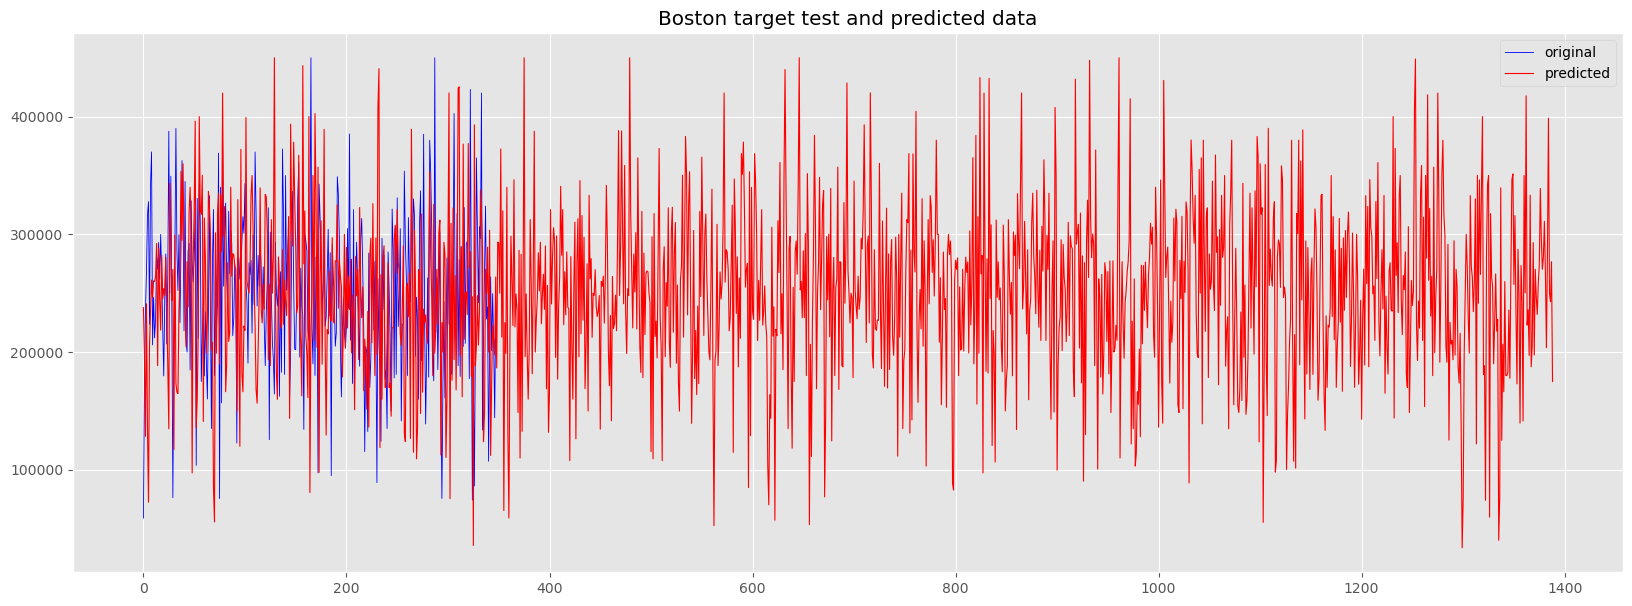

In [112]:
x_ax = range(len(y_train))
x_ax1 = range(len(y_test))
plt.figure(figsize = (20,7))
plt.plot(x_ax1, y_test, lw=0.6, color="blue", label="original")
plt.plot(x_ax, y_train, lw=0.8, color="red", label="predicted")
plt.title("Boston target test and predicted data")
plt.legend()
plt.show()

In [ ]:
data.iloc[5,:]

In [ ]:
[215518.000000,
11.600000,
4.000000,
30.305502,
59.929623,
2.440000,
43.000000,
16711.000000,
0.000000,
0.000000,
0.000000,
0.000000,
1.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
155981.000000,
239806.104651]

In [ ]:
rfc

In [ ]:
factors = [[11.600000,
4.000000,
30.305502,
59.929623,
2.440000,
43.000000,
16711.000000,
0.000000,
0.000000,
0.000000,
0.000000,
1.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
155981.000000,
239806.104651]]  # Example list of factors

# Make predictions
pep = rfc.predict(factors)

# Print or use the forecasted values
print("Forecasted Values:", pep)

In [ ]:
data.columns

In [ ]:
data[data['Frunzensky']==1]

In [73]:
factors = [[119.300000,
11.000000,
30.342404,
59.905357,
3.477,
17.000000,
200711.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
1.000000,
0.000000,
0.000000,
0.000000,
0.000000,
413983.000000,
239806.104651]]  # Example list of factors

# Make predictions
pep = rfc.predict(factors)

# Print or use the forecasted values
print("Forecasted Values:", pep)

Forecasted Values: [263958.008]


In [74]:
predictions2 = rfc.predict(X_test)
#Calculate the root mean squared error
display(rfc.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print(rmse)
print(mean_absolute_error(y_test, predictions2))
print(mean_absolute_percentage_error(y_test, predictions2))

0.34289346762832706

57511.50459576421
42533.63970391062
0.20483356533770675


In [233]:
# Split-out validation dataset
X = df[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Primorsky',
       'Tsentralny', 'Krasnogvardeysky','Vyborgsky', 'Nevsky', 'Petrogradsky', 'population','mean_distr_pps','pub_trans_1km']]
Y = df['price_per_square']


In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 999)

In [180]:
validation_size = 0.5
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

### 4. Evaluate Algorithms: Baseline

In [181]:
# Test options and evaluation metric
num_folds = 2
seed = 999
scoring = 'neg_mean_absolute_percentage_error'

In [182]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.259665 (0.014813)
LASSO: -0.259661 (0.014819)
EN: -0.260326 (0.013798)
KNN: -0.289497 (0.016229)
CART: -0.302674 (0.011455)
SVR: -0.277347 (0.016886)


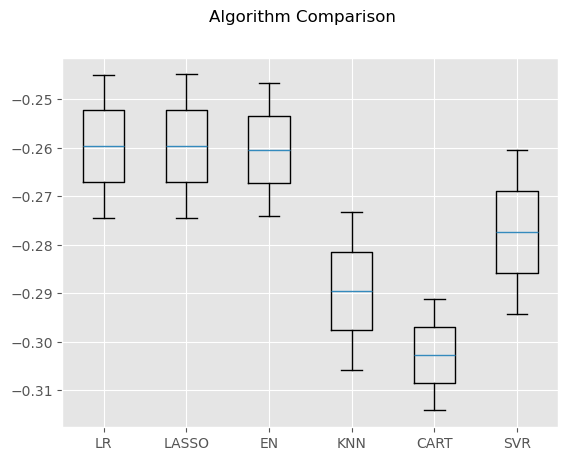

In [183]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Evaluate Algorithms: Standardize Data

In [184]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.259665 (0.014813)
ScaledLASSO: -0.259664 (0.014815)
ScaledEN: -0.262602 (0.015965)
ScaledKNN: -0.270551 (0.015718)
ScaledCART: -0.297353 (0.006967)
ScaledSVR: -0.277345 (0.016885)


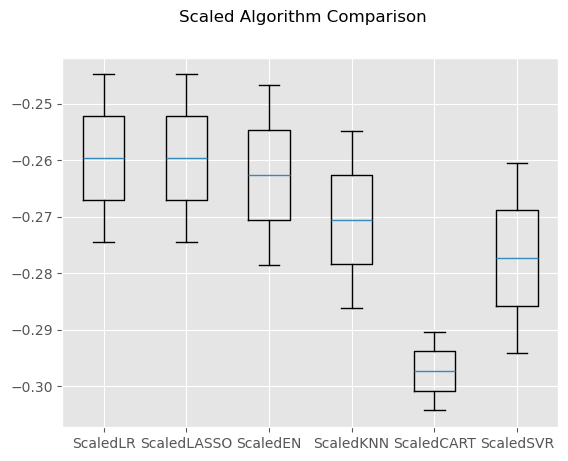

In [185]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 6. Algorithm Tuning

In [186]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
n_ests = numpy.array([50,100,150,200,250,300,350,400])
param_grid = dict(max_depth=k_values,n_estimators = n_ests)
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

### 7. Ensemble Methods

In [188]:
# ensembles
ensembles = []
ensembles.append(('AB',
AdaBoostRegressor()))
ensembles.append(('GBM',
GradientBoostingRegressor()))
ensembles.append(('RF',
RandomForestRegressor(n_estimators=10)))
ensembles.append(('ET',
ExtraTreesRegressor(n_estimators=100)))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: -0.259854 (0.011478)


GBM: -0.242214 (0.011437)
RF: -0.241512 (0.008915)
ET: -0.231127 (0.012785)


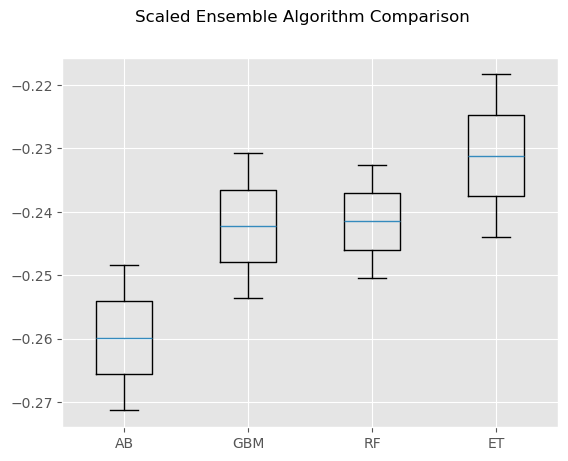

In [189]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [190]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

In [191]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.240766 using {'n_estimators': 50}
-0.240766 (0.011510) with: {'n_estimators': 50}
-0.241982 (0.011526) with: {'n_estimators': 100}
-0.242295 (0.010079) with: {'n_estimators': 150}
-0.242434 (0.008827) with: {'n_estimators': 200}
-0.242678 (0.007269) with: {'n_estimators': 250}
-0.243229 (0.006041) with: {'n_estimators': 300}
-0.243698 (0.005940) with: {'n_estimators': 350}
-0.243548 (0.005626) with: {'n_estimators': 400}


### 8. Finalize Model

In [192]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=50)
model.fit(X_train, Y_train)

ExtraTreesRegressor(n_estimators=50, random_state=999)

In [195]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))
print(mean_absolute_error(Y_validation, predictions))
print(mean_absolute_percentage_error(Y_validation, predictions))

3818241098.0039296
46230.13447180668
0.24093972271063074


In [ ]:
dataset = data[['price_per_square','squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'population']]

In [88]:
data.to_csv('data_extended.csv', encoding='utf-8')

In [89]:
data.corr()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,...,Vyborgsky,Frunzensky,Nevsky,Petrogradsky,Vasileostrovsky,Krasnoselsky,Kirovsky,Moskovsky,population,mean_distr_pps
price_per_square,1.000000,-0.117340,0.202260,-0.065705,0.061760,-0.122176,0.107689,-0.122791,-0.119765,0.104902,...,-0.062168,0.013587,-0.057417,0.047691,0.034557,0.005403,-0.036204,0.108167,0.047268,0.227261
squares,-0.117340,1.000000,-0.005395,-0.002896,0.012064,-0.033442,0.020450,0.621912,-0.021650,0.016084,...,-0.001388,0.006346,-0.008517,0.014525,-0.034403,-0.034573,0.108711,0.000760,0.006684,-0.001607
max_floor,0.202260,-0.005395,1.000000,-0.007748,0.097957,0.077767,-0.035733,0.035426,0.013709,0.108113,...,0.072862,0.016420,0.022075,-0.073540,0.036362,0.042186,-0.040518,-0.013969,0.167230,0.011667
latitude,-0.065705,-0.002896,-0.007748,1.000000,-0.036218,-0.223450,-0.118657,-0.024785,0.184030,-0.296356,...,0.011158,0.154686,0.413338,-0.095598,-0.288651,-0.543714,-0.139462,0.028506,-0.036406,-0.423606
longitude,0.061760,0.012064,0.097957,-0.036218,1.000000,-0.258911,0.257011,0.048707,-0.514391,0.400571,...,0.451962,-0.167684,-0.129087,0.104306,0.047883,-0.330602,-0.148552,-0.281262,0.393115,0.256563
Nevskii prospekt,-0.122176,-0.033442,0.077767,-0.223450,-0.258911,1.000000,-0.287068,-0.041978,0.126951,0.038132,...,-0.105633,-0.043369,0.302487,-0.165009,0.099653,0.553750,0.014532,-0.176479,0.311587,-0.171779
parkings_1km,0.107689,0.020450,-0.035733,-0.118657,0.257011,-0.287068,1.000000,0.023986,-0.231252,0.335306,...,0.113470,0.097427,-0.175450,0.045452,-0.020692,-0.071428,-0.108234,0.052238,0.233378,0.373446
rent_per_m,-0.122791,0.621912,0.035426,-0.024785,0.048707,-0.041978,0.023986,1.000000,-0.054205,0.027045,...,0.011251,-0.002023,-0.013083,0.033022,-0.017974,-0.036572,0.073152,0.000587,0.019278,0.039977
Pushkinsky,-0.119765,-0.021650,0.013709,0.184030,-0.514391,0.126951,-0.231252,-0.054205,1.000000,-0.095130,...,-0.080213,-0.054972,-0.061352,-0.062945,-0.067852,-0.062629,-0.043825,-0.072513,-0.151849,-0.526992
Primorsky,0.104902,0.016084,0.108113,-0.296356,0.400571,0.038132,0.335306,0.027045,-0.095130,1.000000,...,-0.121226,-0.083080,-0.092721,-0.095130,-0.102545,-0.094652,-0.066233,-0.109589,0.667812,0.461592


In [90]:
for i in data.columns:
    print(f"{i}:{pearsonr(data['price_per_square'], data[i])}")

price_per_square:PearsonRResult(statistic=0.9999999999999997, pvalue=0.0)
squares:PearsonRResult(statistic=-0.11734039680720197, pvalue=6.417114412246304e-07)
max_floor:PearsonRResult(statistic=0.2022602973657715, pvalue=5.582834427692247e-18)
latitude:PearsonRResult(statistic=-0.06570525124170215, pvalue=0.005420058388835633)
longitude:PearsonRResult(statistic=0.06176014694143238, pvalue=0.008958274314402631)
Nevskii prospekt:PearsonRResult(statistic=-0.12217639296912275, pvalue=2.1611859234648797e-07)
parkings_1km:PearsonRResult(statistic=0.10768912367800786, pvalue=4.965141214139126e-06)
rent_per_m:PearsonRResult(statistic=-0.1227911097014038, pvalue=1.8762659580295052e-07)
Pushkinsky:PearsonRResult(statistic=-0.11976484814615286, pvalue=3.738373335779406e-07)
Primorsky:PearsonRResult(statistic=0.1049019580550408, pvalue=8.691259671649887e-06)
Tsentralny:PearsonRResult(statistic=-0.04659304847483915, pvalue=0.048727268803762644)
Kalininsky:PearsonRResult(statistic=0.0406572610298171

In [224]:
df = pd.read_csv('data_extended.csv',index_col = 0)
df

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,...,Vyborgsky,Frunzensky,Nevsky,Petrogradsky,Vasileostrovsky,Krasnoselsky,Kirovsky,Moskovsky,population,mean_distr_pps
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0,0,0,...,1,0,0,0,0,0,0,0,541590,236507.113253
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0,0,0,...,0,0,0,0,0,0,0,1,335221,276841.921739
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0,0,1,...,0,0,0,0,0,0,0,0,699243,269920.705778
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0,0,0,...,0,0,0,0,0,0,0,0,366971,235136.752212
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0,0,0,...,0,0,1,0,0,0,0,0,547896,233645.419802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0,0,1,...,0,0,0,0,0,0,0,0,699243,269920.705778
1811,209860.0,650.0,5.0,30.261969,59.852335,8.29,32.0,422500.0,0,0,...,0,0,0,0,0,0,1,0,335774,235598.569811
1812,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0,0,0,...,0,0,1,0,0,0,0,0,547896,233645.419802
1813,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0,0,0,...,0,1,0,0,0,0,0,0,413983,254696.639024


In [228]:
pub_transp = pd.read_csv(r'C:\Users\pelik\python\diplomopis\spb_geo/public-transport-point.csv',sep = '\t')

In [229]:
pub_transp

,X,Y,NAME,NAME_EN,NAME_RU,RAILWAY,HIGHWAY,REF,NETWORK,PUBLIC_TRA,OSM_TYPE,OSM_ID
0,30.464907,59.867661,проспект Обуховской обороны,NaN,NaN,NaN,bus_stop,NaN,NaN,platform,node,15499719
1,30.378129,59.831396,станция метро «Купчино»,NaN,NaN,tram_stop,NaN,NaN,NaN,stop_position,node,254943226
2,30.356159,59.879573,Волковский проспект,NaN,NaN,tram_stop,NaN,NaN,NaN,stop_position,node,255282238
3,30.335113,59.855108,проспект Юрия Гагарина,NaN,NaN,tram_stop,NaN,NaN,NaN,stop_position,node,255352756
4,30.388764,60.003996,Политехнический институт,NaN,NaN,NaN,bus_stop,NaN,NaN,platform,node,255479610
...,...,...,...,...,...,...,...,...,...,...,...,...
7078,30.386967,60.042285,улица Демьяна Бедного,NaN,NaN,NaN,NaN,NaN,NaN,platform,node,11042030325
7079,30.385907,60.042426,улица Демьяна Бедного,NaN,NaN,NaN,NaN,NaN,NaN,platform,node,11042030326
7080,30.438118,59.977885,Бестужевская улица,NaN,NaN,NaN,bus_stop,NaN,NaN,platform,node,11046965758
7081,30.239518,59.976214,Яхт-клуб,NaN,NaN,NaN,bus_stop,NaN,NaN,platform,node,11049312631


In [230]:
import math as m

In [231]:
df['pub_trans_1km'] = 0.0
for r in range(0,1790):
    for park in range(0,7083):
        distance = round(111.2 * m.acos((m.sin(df.iat[r,3]) * m.sin(pub_transp.iat[park,0]) + (m.cos(df.iat[r,3]) * m.cos(pub_transp.iat[park,0]) * m.cos(df.iat[r,4] - pub_transp.iat[park,1] ) ))),2)
        if distance <= 1.0:
            df.iat[r,-1] += 1

In [232]:
for i in df.columns:
    print(f"{i}:{pearsonr(df['price_per_square'], df[i])}")

price_per_square:PearsonRResult(statistic=0.9999999999999997, pvalue=0.0)
squares:PearsonRResult(statistic=-0.11734039680720197, pvalue=6.417114412246304e-07)
max_floor:PearsonRResult(statistic=0.2022602973657715, pvalue=5.582834427692247e-18)
latitude:PearsonRResult(statistic=-0.06570525124170215, pvalue=0.005420058388835633)
longitude:PearsonRResult(statistic=0.06176014694143238, pvalue=0.008958274314402631)
Nevskii prospekt:PearsonRResult(statistic=-0.12217639296912275, pvalue=2.1611859234648797e-07)
parkings_1km:PearsonRResult(statistic=0.10768912367800786, pvalue=4.965141214139126e-06)
rent_per_m:PearsonRResult(statistic=-0.1227911097014038, pvalue=1.8762659580295052e-07)
Pushkinsky:PearsonRResult(statistic=-0.11976484814615286, pvalue=3.738373335779406e-07)
Primorsky:PearsonRResult(statistic=0.1049019580550408, pvalue=8.691259671649887e-06)
Tsentralny:PearsonRResult(statistic=-0.04659304847483915, pvalue=0.048727268803762644)
Kalininsky:PearsonRResult(statistic=0.0406572610298171